<a href="https://colab.research.google.com/github/DwiIra/Tugas-Model-Warna-Citra/blob/main/tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

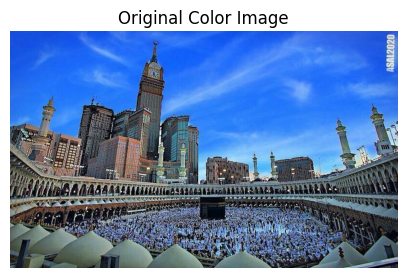

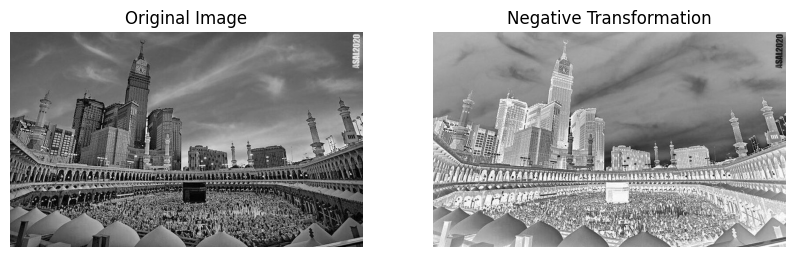

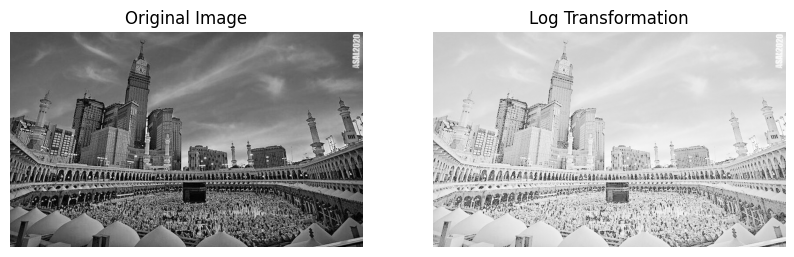

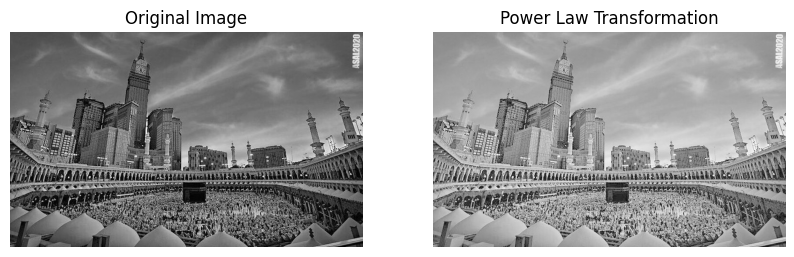

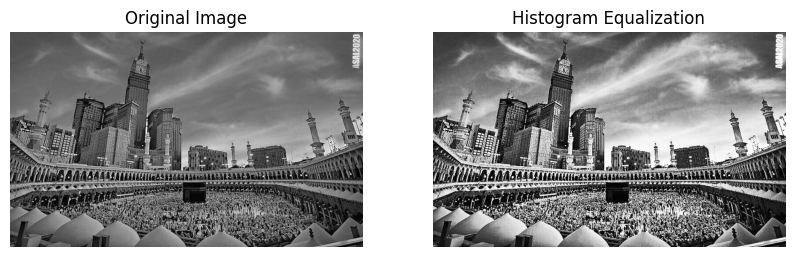

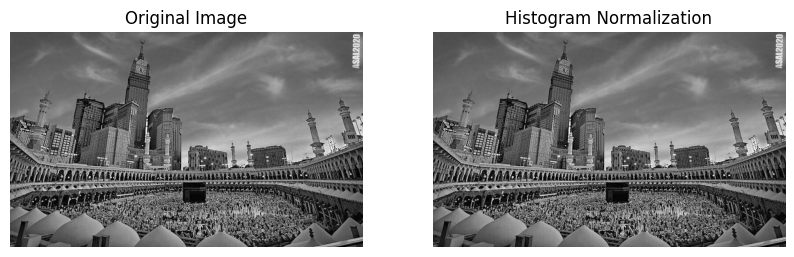

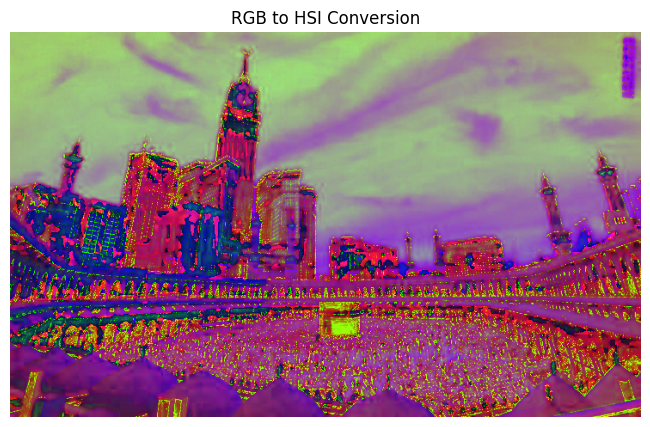

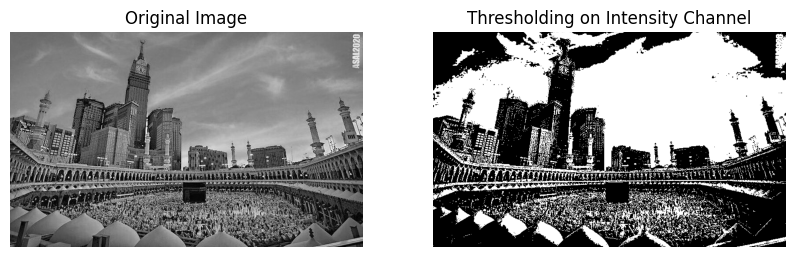

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path, grayscale=True):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR)
    if image is None:
        raise FileNotFoundError(f"Gambar tidak ditemukan di: {image_path}")
    if not grayscale:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def negative_transformation(image):
    return 255 - image

def log_transformation(image):
    c = 255 / np.log(1 + np.max(image))
    return (c * np.log(1 + image + 1e-6)).astype(np.uint8)

def power_law_transformation(image, gamma=1.0):
    c = 255 / (np.max(image) ** gamma)
    return (c * (image ** gamma)).astype(np.uint8)

def histogram_equalization(image):
    return cv2.equalizeHist(image)

def histogram_normalization(image):
    norm_img = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return norm_img.astype(np.uint8)

def rgb_to_hsi(image):
    image = image / 255.0
    R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G) ** 2 + (R - B) * (G - B))
    theta = np.arccos(num / (den + 1e-6))
    H = np.where(B > G, 2*np.pi - theta, theta)
    H = H / (2 * np.pi) * 255
    S = 1 - (3 / (R + G + B + 1e-6)) * np.minimum(R, np.minimum(G, B))
    I = (R + G + B) / 3
    return np.stack((H, S * 255, I * 255), axis=-1).astype(np.uint8)

def thresholding(image, threshold=128):
    return (image > threshold).astype(np.uint8) * 255

def display_images(original, processed, title, color=False):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Original Image')
    plt.imshow(original if color else original, cmap=None if color else 'gray')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title(title)
    plt.imshow(processed, cmap=None if color else 'gray')
    plt.axis('off')

    plt.show()

def main():
    image_path = 'kabah.jpeg'
    original = load_image(image_path)
    original_color = load_image(image_path, grayscale=False)

    plt.figure(figsize=(5,5))
    plt.title('Original Color Image')
    plt.imshow(original_color)
    plt.axis('off')
    plt.show()

    negative = negative_transformation(original)
    display_images(original, negative, 'Negative Transformation')

    log_transformed = log_transformation(original)
    display_images(original, log_transformed, 'Log Transformation')

    power_law_transformed = power_law_transformation(original, gamma=0.5)
    display_images(original, power_law_transformed, 'Power Law Transformation')

    hist_equalized = histogram_equalization(original)
    display_images(original, hist_equalized, 'Histogram Equalization')

    hist_normalized = histogram_normalization(original)
    display_images(original, hist_normalized, 'Histogram Normalization')

    rgb_image = load_image(image_path, grayscale=False)
    hsi_image = rgb_to_hsi(rgb_image)
    plt.figure(figsize=(10,5))
    plt.imshow(hsi_image)
    plt.title('RGB to HSI Conversion')
    plt.axis('off')
    plt.show()

    intensity_channel = hsi_image[:,:,2]
    thresholded = thresholding(intensity_channel, threshold=128)
    display_images(intensity_channel, thresholded, 'Thresholding on Intensity Channel')

if __name__ == "__main__":
    main()
